**Click on File and save a copy in Drive.**

### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [1]:
! pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=e5be0db51711334afbbb64d397560034b4599a5e083c0f863074af4ca460ddd5
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

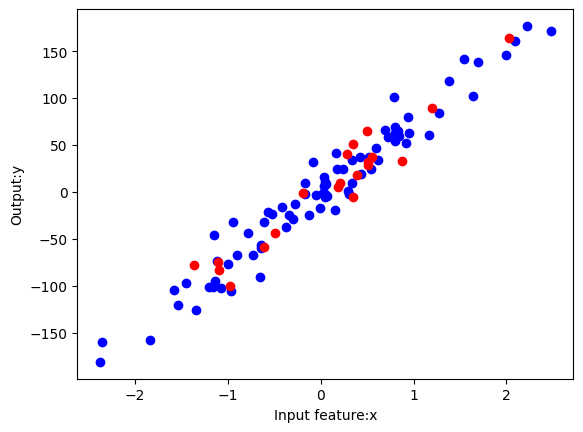

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Your code here
# plotting the data

plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')

plt.xlabel('Input feature:x')
plt.ylabel('Output:y')


plt.show()




You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (xw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x(y_i -(m  x +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [4]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # Your code here
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.W = 100
        self.b = 5


    # The following function would be the heart of the model. This is where the training would happen.
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0
        # Gradient Descent code goes here
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.W) + self.b
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db
        print(self.W)
        print(self.b)


    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        return X*self.W+self.b





### Initializing, Training & Predictions

[47.78107018]
0.399492078958752


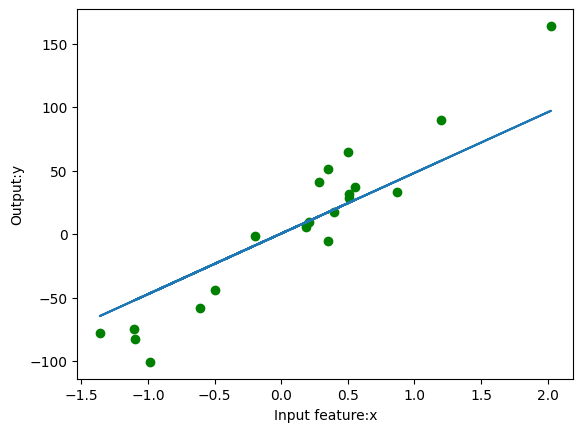

In [5]:
# Now, we make an object of our custom class.
regressor = LinearRegression()
# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train, y_train)

# Now, let's see our what our model predicts
# pass appropriate part of dataset
y_pred=regressor.predict(X_test)
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,y_pred)
plt.xlabel('Input feature:x')
plt.ylabel('Output:y')
plt.show()


### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [6]:
def mean_squared_error(y_true, y_pred):
  y_true=(np.array(y_true)).reshape(20,1)
  return(np.var(y_true-y_pred))


def r2_score(y_true, y_pred):


    # return the r2 score
     y_true=(np.array(y_true)).reshape(20,1)
     return(1-(np.var(y_true-y_pred)/np.var(y_true)))


import math
mse =  mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("Std Deviation:", math.sqrt(mse))
accu = r2_score(y_test, y_pred)
print("Accuracy:", accu*100,"%")

MSE: 783.0872719399679
Std Deviation: 27.9836965381625
Accuracy: 80.72887135417753 %


[Please click on this link to access subjective questions](https://docs.google.com/document/d/1ty9m1vUoPNh_WU8qATznTKukukkSwOlnLJazhBFmWO4/edit?usp=sharing)